<a href="https://colab.research.google.com/github/SasukeUchiha1608/AI-Driven-Route-Optimization-with-Weather-Image-Correlation/blob/main/Dikjstra_AI_map_route_finder_with_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First iteration#
In this phase of the proyect we focused on implementing correctly the dijkstra algorithm.

Shortest route: [(6, 0), (6, 1), (6, 2), (5, 2), (4, 2), (4, 3), (3, 3)]
Length of the shortest route: 6


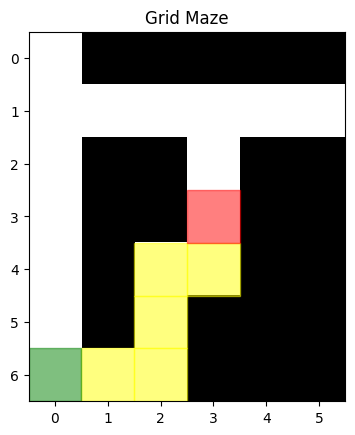

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import deque
import heapq

def load_maze_from_csv(file_path):
    with open(file_path, 'r') as file:
        maze_reader = csv.reader(file)
        maze = [list(map(int, row)) for row in maze_reader]
    return np.array(maze)

def draw_grid_maze(maze, path, start, target):
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap='gray_r', interpolation='nearest')

    for state in path:
        if state != start and state != target:
            ax.add_patch(plt.Rectangle((state[1] - 0.5, state[0] - 0.5), 1, 1, color='yellow', alpha=0.5))

    ax.add_patch(plt.Rectangle((start[1] - 0.5, start[0] - 0.5), 1, 1, color='green', alpha=0.5))
    ax.add_patch(plt.Rectangle((target[1] - 0.5, target[0] - 0.5), 1, 1, color='red', alpha=0.5))

    plt.title('Grid Maze')
    plt.show()

def dijkstra(maze, start, target):
    visited = set()
    queue = [(0, start)]
    visited.add(start)
    path = {start: None}

    while queue:
        cost, current = heapq.heappop(queue)
        if current == target:
            break
        neighbors = [(current[0] + 1, current[1]), (current[0] - 1, current[1]),
                     (current[0], current[1] + 1), (current[0], current[1] - 1)]

        for neighbor in neighbors:
            if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]) and maze[neighbor[0]][neighbor[1]] == 0 and neighbor not in visited:
                visited.add(neighbor)
                path[neighbor] = current
                heapq.heappush(queue, (cost + 1, neighbor))

    current = target
    shortest_path = []
    while current is not None:
        shortest_path.append(current)
        current = path[current]
    shortest_path.reverse()

    return shortest_path

file_path = 'maze_02.csv'
maze_data = load_maze_from_csv(file_path)

start = (6, 0)
target = (3, 3)
shortest_path = dijkstra(maze_data, start, target)

print("Shortest route:", shortest_path)
print("Length of the shortest route:", len(shortest_path) - 1)

draw_grid_maze(maze_data, shortest_path, start, target)

#Second Iteration#
For this phase we implemented the dijkstra algorithm drawn in graphs.
And we also use cross-correlation to detect image relation between two images in this case to detect whether the traffic light is green, red, or yellow.


Shortest distance from a to z: 24


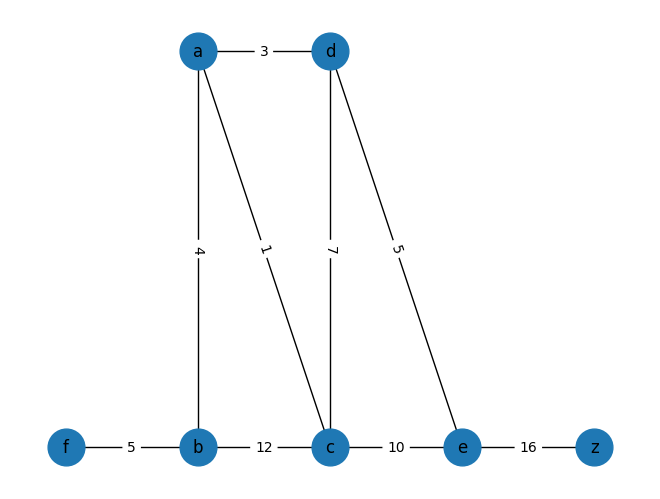

In [ ]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.nodes = {}

    def add_node(self, node):
        self.nodes[node] = {}

    def add_edge(self, start, end, cost):
        self.nodes[start][end] = cost
        self.nodes[end][start] = cost

    def get_neighbors(self, node):
        return self.nodes[node].keys()

def dijkstra(graph, start, end):
    queue = [(0, start)]
    visited = set()
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_node == end:
            return distances[end]

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor in graph.get_neighbors(current_node):
            distance = current_distance + graph.nodes[current_node][neighbor]

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    return float('inf')

def draw_graph(graph):
    G = nx.Graph()
    for start_node, edges in graph.nodes.items():
        for end_node, weight in edges.items():
            G.add_edge(start_node, end_node, weight=weight)

    pos = {
        'a': (0, 1),
        'b': (0, 0),
        'c': (1, 0),
        'd': (1, 1),
        'e': (2, 0),
        'f': (-1, 0),
        'z': (3, 0)
    }

    nx.draw(G, pos, with_labels=True, node_size=700)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show()

g = Graph()
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'z']
for node in nodes:
    g.add_node(node)

g.add_edge('a', 'b', 4)
g.add_edge('b', 'c', 12)
g.add_edge('c', 'e', 10)
g.add_edge('e', 'd', 5)
g.add_edge('d', 'a', 3)
g.add_edge('e', 'z', 16)
g.add_edge('b', 'f', 5)
g.add_edge('c', 'a', 1)
g.add_edge('d', 'c', 7)

print("Shortest distance from a to z:", dijkstra(g, 'a', 'z'))
draw_graph(g)


#Cross correlating images#

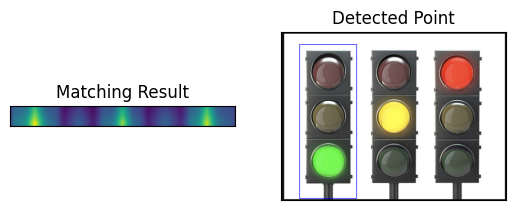

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

traffic_lights = cv2.imread('semaforos.png')
green_light = cv2.imread('s-green.png')

traffic_lights_gray = cv2.cvtColor(traffic_lights, cv2.COLOR_BGR2GRAY)
green_light_gray = cv2.cvtColor(green_light, cv2.COLOR_BGR2GRAY)

if traffic_lights_gray.shape[0] < green_light_gray.shape[0] or traffic_lights_gray.shape[1] < green_light_gray.shape[1]:
    scale_percent_width = (traffic_lights_gray.shape[1] / green_light_gray.shape[1]) * 100 - 5
    scale_percent_height = (traffic_lights_gray.shape[0] / green_light_gray.shape[0]) * 100 - 5
    scale_percent = min(scale_percent_width, scale_percent_height)

    green_light_gray = resize_image(green_light_gray, scale_percent)

result = cv2.matchTemplate(traffic_lights_gray, green_light_gray, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
h, w = green_light_gray.shape
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(traffic_lights, top_left, bottom_right, (255, 0, 0), 2)

plt.subplot(121)
plt.imshow(result)
plt.title('Matching Result')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(traffic_lights, cv2.COLOR_BGR2RGB))
plt.title('Detected Point')
plt.xticks([]), plt.yticks([])

plt.show()


#Third Iteration#

In [ ]:
import cv2
import numpy as np

def detect_traffic_light_color(image_path):
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    lower_green = np.array([50, 100, 100])
    upper_green = np.array([70, 255, 255])

    mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

    red_pixels = cv2.countNonZero(mask_red)
    yellow_pixels = cv2.countNonZero(mask_yellow)
    green_pixels = cv2.countNonZero(mask_green)

    if red_pixels > yellow_pixels and red_pixels > green_pixels:
        return "Red"
    elif yellow_pixels > red_pixels and yellow_pixels > green_pixels:
        return "Yellow"
    else:
        return "Green"

image_path = "b-green.png"
color = detect_traffic_light_color(image_path)
print("The traffic light color is:", color)


The traffic light color is: Green


Shortest distance from a to z: 11
Optimal path: ['a', 'e', 'b', 'c', 'f', 'z']


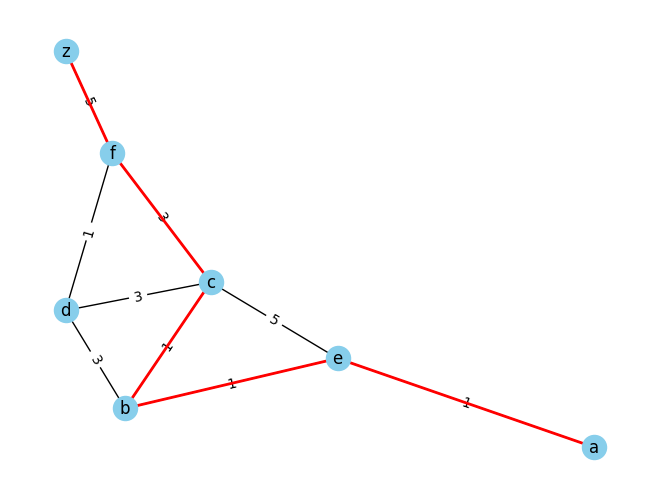

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def detect_traffic_light_color(image_path):
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    lower_green = np.array([50, 100, 100])
    upper_green = np.array([70, 255, 255])

    mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

    red_pixels = cv2.countNonZero(mask_red)
    yellow_pixels = cv2.countNonZero(mask_yellow)
    green_pixels = cv2.countNonZero(mask_green)

    if red_pixels > yellow_pixels and red_pixels > green_pixels:
        return 5
    elif yellow_pixels > red_pixels and yellow_pixels > green_pixels:
        return 3
    else:
        return 1

class Graph:
    def __init__(self):
        self.nodes = {}

    def add_node(self, node):
        if node not in self.nodes:
            self.nodes[node] = {}

    def add_edge(self, start, end, cost):
        self.add_node(start)
        self.add_node(end)
        self.nodes[start][end] = cost
        self.nodes[end][start] = cost

    def get_neighbors(self, node):
        return self.nodes[node]

def dijkstra(graph, start, end):
    queue = [(0, start, [])]
    visited = set()
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0

    while queue:
        current_distance, current_node, path = heapq.heappop(queue)

        if current_node == end:
            return current_distance, path + [end]

        if current_node in visited:
            continue

        visited.add(current_node)
        for neighbor, distance in graph.get_neighbors(current_node).items():
            if neighbor not in visited:
                new_distance = current_distance + distance
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    heapq.heappush(queue, (new_distance, neighbor, path + [current_node]))

    return float('inf'), []  # If no path found

def draw_graph(graph, shortest_path=None):
    G = nx.Graph()
    for start_node, edges in graph.nodes.items():
        for end_node, weight in edges.items():
            G.add_edge(start_node, end_node, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    if shortest_path:
        shortest_path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)

    plt.show()

g = Graph()

g.add_edge('a', 'e', detect_traffic_light_color('b-green.png'))
g.add_edge('b', 'c', detect_traffic_light_color('b-green.png'))
g.add_edge('c', 'd', detect_traffic_light_color('b-yellow.png'))
g.add_edge('d', 'f', detect_traffic_light_color('b-green.png'))
g.add_edge('e', 'c', detect_traffic_light_color('b-red.png'))
g.add_edge('f', 'z', detect_traffic_light_color('b-red.png'))
g.add_edge('b', 'd', detect_traffic_light_color('b-yellow.png'))
g.add_edge('f', 'c', detect_traffic_light_color('b-yellow.png'))
g.add_edge('b', 'e', detect_traffic_light_color('b-green.png'))

distance, optimal_path = dijkstra(g, 'a', 'z')

print("Shortest distance from a to z:", distance)
print("Optimal path:", optimal_path)

draw_graph(g, optimal_path)


#Final product#
For the final product we decided to do something more realistic and instead of just detecting the traffic light color, we made it a more realistic map by detecting if it was raining, snowing, or cloudy, by applying some filters on random images of streets in Tijuana, Mexico. And cross-correlating those images to assign the value of each route on the map.

###Image filters###
Here we apply the filters to the images of random streets in Tijuana.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs('/content/Filtros', exist_ok=True)

def add_blur(image, x, y, hw):
    if image[y:y+hw, x:x+hw, 1].size == 0:
        return image
    image[y:y+hw, x:x+hw, 1] = image[y:y+hw, x:x+hw, 1] + 1
    image[:, :, 1][image[:, :, 1] > 255] = 255
    if np.any(image[y:y+hw, x:x+hw, 1]):
        image[y:y+hw, x:x+hw, 1] = cv2.blur(image[y:y+hw, x:x+hw, 1], (10, 10))
    return image

def apply_cloudy_effect(image_path, save_path):
    original_image = cv2.imread(image_path)
    if original_image is None:
        print("Failed to load image.")
        return
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)
    s = s * 0.4
    s = np.clip(s, 0, 255).astype(np.uint8)
    hsv_image = cv2.merge([h, s, v])
    desaturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    cloudy_image = cv2.GaussianBlur(desaturated_image, (15, 15), 0)
    cloudy_image = cv2.addWeighted(cloudy_image, 1.10, cloudy_image, 0, 0)
    full_save_path = os.path.join(save_path, 'cloudy_effect.png')
    cv2.imwrite(full_save_path, cloudy_image)
    print(f"Cloudy effect image saved to {full_save_path}")

def apply_weather_effects(image_path, save_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return
    image_blurred = cv2.GaussianBlur(image, (25, 25), 0)
    hsv_image = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)
    s = s * 0.4
    s = np.clip(s, 0, 255).astype(np.uint8)
    hsv_image = cv2.merge([h, s, v])
    image_blurred = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    image_blurred = cv2.GaussianBlur(image_blurred, (25, 25), 0)
    image = cv2.addWeighted(image_blurred, 1.10, image_blurred, 0, 0)
    rain_density = 500
    rain_color = (113, 91, 82)
    line_thickness = 3
    line_length = 30
    for _ in range(rain_density):
        x1 = np.random.randint(0, image.shape[1])
        y1 = np.random.randint(0, image.shape[0])
        x2 = x1 + np.random.randint(1, 4)
        y2 = y1 + line_length
        cv2.line(image, (x1, y1), (x2, y2), rain_color, line_thickness)
    full_save_path = os.path.join(save_path, 'weather_effects.png')
    cv2.imwrite(full_save_path, image)
    print(f"Weather effects image saved to {full_save_path}")

def apply_snow_effect(image_path, save_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_HLS = np.array(image_HLS, dtype=np.float64)
    brightness_coefficient = 2.5
    snow_point = 140
    image_HLS[:, :, 1][image_HLS[:, :, 1] < snow_point] = image_HLS[:, :, 1][image_HLS[:, :, 1] < snow_point] * brightness_coefficient
    image_HLS[:, :, 1][image_HLS[:, :, 1] > 255] = 255
    image_HLS = np.array(image_HLS, dtype=np.uint8)
    snowy_image = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)
    full_save_path = os.path.join(save_path, 'snow_effect.png')
    cv2.imwrite(full_save_path, snowy_image)
    print(f"Snowy effect image saved to {full_save_path}")

def filtro_calor_Extremo(image_path, save_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return
    rows, cols, _ = image.shape
    heat_image = np.copy(image)
    for i in range(rows):
        shift = int(5 * np.sin(2 * np.pi * i / 60))
        heat_image[i, :] = np.roll(image[i, :], shift, axis=0)
    heat_image = cv2.convertScaleAbs(heat_image, alpha=1.05, beta=10)
    full_save_path = os.path.join(save_path, 'heat_effect.png')
    cv2.imwrite(full_save_path, heat_image)
    print(f"Heat effect image saved to {full_save_path}")

apply_cloudy_effect('calzcetys.png', '/content/Filtros')
apply_weather_effects('blvbernardo.png', '/content/Filtros')
apply_snow_effect('avinsurgentes.png', '/content/Filtros')
filtro_calor_Extremo('Boulevard-aguacaliente.png', '/content/Filtros')


Cloudy effect image saved to /content/Filtros/cloudy_effect.png
Weather effects image saved to /content/Filtros/weather_effects.png
Snowy effect image saved to /content/Filtros/snow_effect.png
Heat effect image saved to /content/Filtros/heat_effect.png


#Search algorithm#
Here we make the graph version of the nodes and the routes, while applying the weight to each route of the images it detects on each route.

Enter the start node: a
Enter the end node: z
Shortest distance from a to z: 11
Optimal path: ['a', 'f', 'e', 'c', 'd', 'j', 'l', 'r', 'q', 'z']


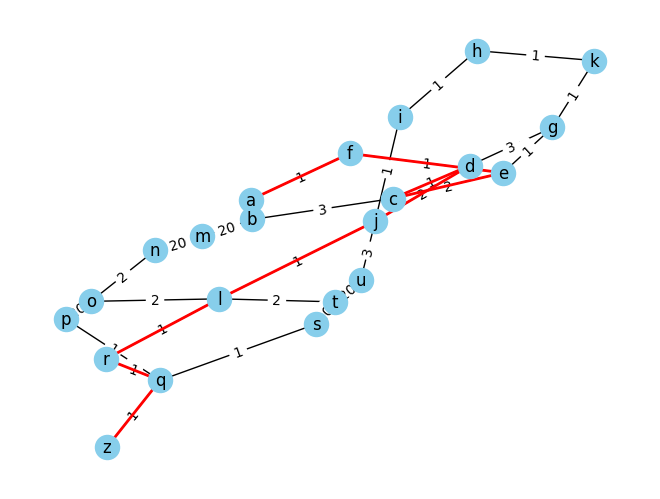

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import os

os.makedirs('/content/Filtros', exist_ok=True)

def add_blur(image, x, y, hw):
    if image[y:y+hw, x:x+hw, 1].size == 0:
        return image
    image[y:y+hw, x:x+hw, 1] += 1
    image[:, :, 1][image[:, :, 1] > 255] = 255
    if np.any(image[y:y+hw, x:x+hw, 1]):
        image[y:y+hw, x:x+hw, 1] = cv2.blur(image[y:y+hw, x:x+hw, 1], (10, 10))
    return image

def apply_cloudy_effect(image_path, save_path):
    original_image = cv2.imread(image_path)
    if original_image is None:
        print("Failed to load image.")
        return
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)
    s *= 0.4
    s = np.clip(s, 0, 255).astype(np.uint8)
    hsv_image = cv2.merge([h, s, v])
    desaturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    cloudy_image = cv2.GaussianBlur(desaturated_image, (15, 15), 0)
    cloudy_image = cv2.addWeighted(cloudy_image, 1.10, cloudy_image, 0, 0)
    full_save_path = os.path.join(save_path, 'cloudy_effect.png')
    cv2.imwrite(full_save_path, cloudy_image)
    print(f"Cloudy effect image saved to {full_save_path}")

def simulate_filter_detection(image_path):
    if 'cloudy' in image_path:
        return 'apply_cloudy_effect'
    elif 'snow' in image_path:
        return 'apply_snow_effect'
    elif 'weather' in image_path:
        return 'apply_weather_effects'
    elif 'heat' in image_path:
        return 'filtro_calor_Extremo'
    return None

def detect_applied_filter(image_path):
    filter_to_weight = {
        'apply_snow_effect': 3,
        'filtro_calor_Extremo': 1,
        'apply_cloudy_effect': 2,
        'apply_weather_effects': 20
    }
    applied_filter = simulate_filter_detection(image_path)
    return filter_to_weight.get(applied_filter, 5)

class Graph:
    def __init__(self):
        self.nodes = {}

    def add_node(self, node):
        if node not in self.nodes:
            self.nodes[node] = {}

    def add_edge(self, start, end, cost):
        self.add_node(start)
        self.add_node(end)
        self.nodes[start][end] = cost
        self.nodes[end][start] = cost

    def get_neighbors(self, node):
        return self.nodes[node]

def dijkstra(graph, start, end):
    queue = [(0, start)]
    visited = set()
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    previous_nodes = {node: None for node in graph.nodes}
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_node == end:
            break
        if current_node in visited:
            continue
        visited.add(current_node)
        for neighbor, distance in graph.get_neighbors(current_node).items():
            if neighbor not in visited:
                new_distance = current_distance + distance
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    previous_nodes[neighbor] = current_node
                    heapq.heappush(queue, (new_distance, neighbor))

    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous_nodes[current]
    path.reverse()
    return distances[end], path

def draw_graph(graph, shortest_path=None):
    G = nx.Graph()
    for start_node, edges in graph.nodes.items():
        for end_node, weight in edges.items():
            G.add_edge(start_node, end_node, weight=weight)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    if shortest_path:
        shortest_path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)
    plt.show()

g = Graph()
edges = [
    ('a', 'b', detect_applied_filter('/content/Filtros/weather_effects.png')),
    ('b', 'c', detect_applied_filter('/content/Filtros/snow_effect.png')),
    ('c', 'd', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('f', 'a', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('e', 'c', detect_applied_filter('/content/Filtros/cloudy_effect.png')),
    ('f', 'e', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('g', 'e', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('a', 'f', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('g', 'd', detect_applied_filter('/content/Filtros/snow_effect.png')),
    ('d', 'j', detect_applied_filter('/content/Filtros/cloudy_effect.png')),
    ('h', 'i', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('h', 'k', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('g', 'k', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('i', 'j', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('l', 'j', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('b', 'm', detect_applied_filter('/content/Filtros/weather_effects.png')),
    ('m', 'n', detect_applied_filter('/content/Filtros/weather_effects.png')),
    ('n', 'o', detect_applied_filter('/content/Filtros/cloudy_effect.png')),
    ('o', 'p', detect_applied_filter('/content/Filtros/weather_effects.png')),
    ('p', 'q', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('q', 'z', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('r', 'q', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('r', 'l', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('o', 'l', detect_applied_filter('/content/Filtros/cloudy_effect.png')),
    ('s', 'q', detect_applied_filter('/content/Filtros/heat_effect.png')),
    ('s', 't', detect_applied_filter('/content/Filtros/weather_effects.png')),
    ('t', 'l', detect_applied_filter('/content/Filtros/cloudy_effect.png')),
    ('u', 't', detect_applied_filter('/content/Filtros/weather_effects.png')),
    ('u', 'j', detect_applied_filter('/content/Filtros/snow_effect.png')),
]
for edge in edges:
    g.add_edge(*edge)

start_node = input("Enter the start node: ")
end_node = input("Enter the end node: ")

distance, path = dijkstra(g, start_node, end_node)
print(f"Shortest distance from {start_node} to {end_node}: {distance}")
print(f"Optimal path: {path}")
draw_graph(g, path)


#Google Maps API#
And here we use an API to visualize the project in a google maps format.

In [ ]:
import folium

locations = {
    'a': (32.506143, -116.9252738),
    'b': (32.5082394, -116.9259004),
    'c': (32.5020541, -116.9352603),
    'd': (32.5028685, -116.945796),
    'e': (32.49811, -116.9323153),
    'f': (32.5045887, -116.924848),
    'g': (32.4974532, -116.9334363),
    'h': (32.4924324, -116.9365331),
    'i': (32.4888809, -116.9423696),
    'j': (32.495041, -116.9512888),
    'k': (32.4930363, -116.9299082),
    'l': (32.503703, -116.9632176),
    'm': (32.508269, -116.9230586),
    'n': (32.5151762, -116.9254617),
    'o': (32.5151423, -116.962501),
    'p': (32.5171513, -116.9866907),
    'q': (32.5110061, -116.9871684),
    'r': (32.508732, -116.9725244),
    's': (32.504208, -116.9758289),
    't': (32.4990372, -116.966969),
    'u': (32.4918195, -116.9545075),
    'z': (32.5092437, -116.9927148),
}

map_tijuana = folium.Map(location=[32.50664764219489, -116.92502340117797], zoom_start=17)

for start_node, edges in g.nodes.items():
    for end_node, weight in edges.items():
        start_pos = locations[start_node]
        end_pos = locations[end_node]
        folium.PolyLine([start_pos, end_pos], color='blue', weight=5).add_to(map_tijuana)
        folium.Marker(start_pos, popup=f'{start_node}', tooltip=f'{start_node}').add_to(map_tijuana)
        folium.Marker(end_pos, popup=f'{end_node}', tooltip=f'{end_node}').add_to(map_tijuana)

path_coordinates = [locations[node] for node in path]

folium.PolyLine(path_coordinates, color='red', weight=5).add_to(map_tijuana)

for node in path:
    folium.Marker(locations[node], popup=f'{node}', tooltip=f'{node}', icon=folium.Icon(color='red')).add_to(map_tijuana)

map_tijuana.save('map_tijuana.html')
map_tijuana


#Image Filters Visualization#
And here we just show what the code is detecting for each route to determine the weight between nodes.

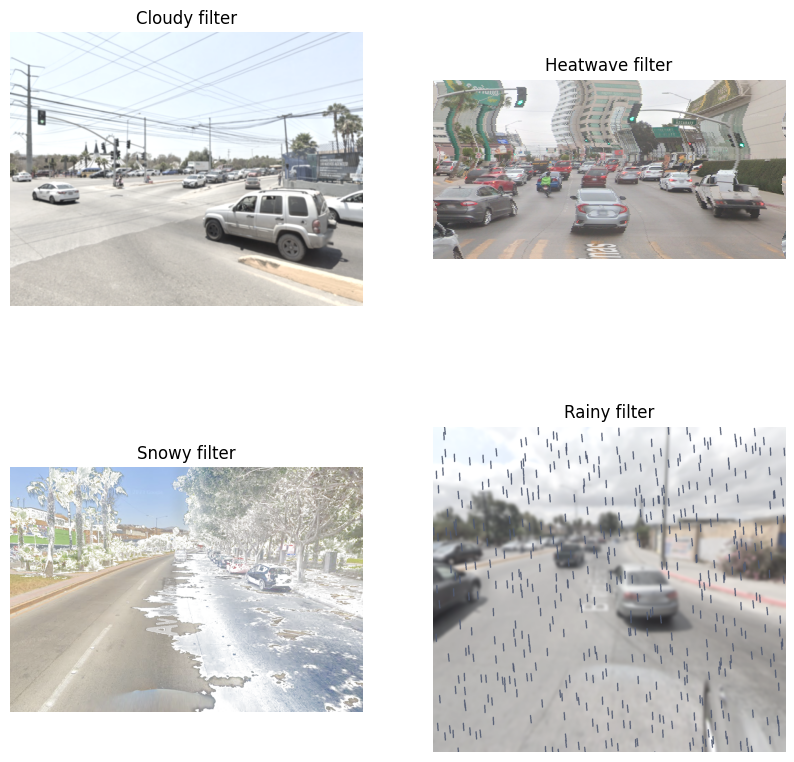

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = [
    "Filtros/cloudy_effect.png",
    "Filtros/heat_effect.png",
    "Filtros/snow_effect.png",
    "Filtros/weather_effects.png"
]

titles = [
    "Cloudy filter",
    "Heatwave filter",
    "Snowy filter",
    "Rainy filter"
]

plt.figure(figsize=(10, 10))

for i, (image_path, title) in enumerate(zip(image_paths, titles)):
    img = mpimg.imread(image_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.show()
